## Instructions to follow:

- Please include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set (if available) into a **datasets** folder.
- Put your images (if available) into an **img** folder.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

In [74]:
# Import necessary libraries
import pandas as pd
import sklearn.datasets
# used in B) to split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
# used in C) to create a heatmap and to calculate the Variance Inflation Factor (VIF)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
# used in D) to create a grid search object
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# used in E) to print the classification report, confusion matrix, and accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Q2)**  

**a)** Create a synthetic dataset using scikit-learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function with the following specifications:

 - Number of samples: 1000,
 - Number of features: 10,
 - Number of informative features: 2,
 - Number of redundant features: 8,
 - Number of classes: 2 (binary classification), and
 - Random seed for reproducibility: 1773.

**ANSWER IS HERE**

In [75]:
# Create a synthetic dataset
features_X, target_y = sklearn.datasets.make_classification(n_samples=1000, 
                                                            n_features=10, 
                                                            n_informative=2, 
                                                            n_redundant=8, 
                                                            n_classes=2, 
                                                            random_state=1773)

In [76]:
# Create a dataframe
df = pd.DataFrame(features_X, columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'])
df['target'] = target_y
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-0.131774,-0.528168,-0.177143,0.844746,1.146094,0.199649,1.158868,-0.744826,-1.055883,0.091921,1
1,0.443329,-0.019216,-0.718425,0.392828,1.046905,-0.496318,0.773446,-1.097629,-0.816492,0.087170,1
2,1.578118,1.331247,-1.533131,-1.122401,-0.093806,-1.903398,-0.887634,-1.099217,0.497952,0.001385,0
3,-0.894954,-1.096855,0.619242,1.252277,0.986452,1.112802,1.392760,-0.062565,-1.114011,0.074675,1
4,-1.434496,-0.409320,1.979598,-0.421926,-2.100513,1.651990,-1.276174,2.605708,1.495113,-0.177996,1


**b)** Arrange your _feature matrix_ and _target vector_ accordingly. Split your _feature matrix_ and _target vector_ into test and train sets with a splitting ratio of _0.2_ and _random_state=1773_.

**ANSWER IS HERE**

In [77]:
# Arranging feature matrix and target vector
X = df.drop('target', axis=1)
y = df['target']

In [78]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1773)

**c)** Generate a heatmap using your training feature matrix and provide comments based on the observed patterns.

**ANSWER IS HERE**

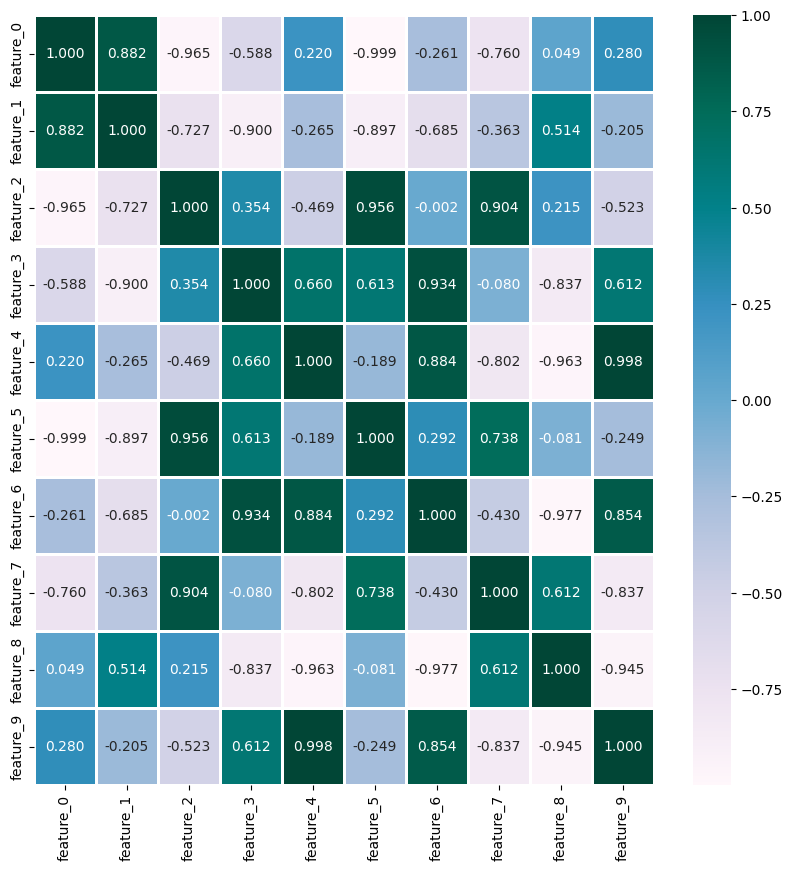

In [79]:
# Generate a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.3f', linewidths=2, cmap='PuBuGn')
plt.show()

In [80]:
# Coleration Analysis with Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values("VIF Factor", ascending=False, inplace=True)
vif

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,feature_0,inf
1,feature_1,inf
2,feature_2,inf
3,feature_3,inf
4,feature_4,inf
5,feature_5,inf
6,feature_6,inf
7,feature_7,inf
8,feature_8,inf
9,feature_9,inf


In [81]:
def vif_calculator(dataframe, target_feature):

    new_df = dataframe.drop(columns=[target_feature], axis=1)
    vif_df = pd.DataFrame() # create an empty data frame
    vif_df["feature"] = new_df.columns  # attach a column of involving feature names
    vif_df["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(len(new_df.columns))]  #list comprehension
    vif_df.sort_values('VIF', ascending=False, inplace=True) #ignore intercept row  in the below table

    return vif_df, new_df

In [82]:
vif_df, new_df = vif_calculator(X_train, 'feature_0')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_1,inf
1,feature_2,inf
2,feature_3,inf
3,feature_4,inf
4,feature_5,inf
5,feature_6,inf
6,feature_7,inf
7,feature_8,inf
8,feature_9,inf


In [83]:
vif_df, new_df = vif_calculator(new_df, 'feature_1')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_2,inf
1,feature_3,inf
2,feature_4,inf
3,feature_5,inf
4,feature_6,inf
5,feature_7,inf
6,feature_8,inf
7,feature_9,inf


In [84]:
vif_df, new_df = vif_calculator(new_df, 'feature_2')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_3,inf
1,feature_4,inf
2,feature_5,inf
3,feature_6,inf
4,feature_7,inf
5,feature_8,inf
6,feature_9,inf


In [85]:
vif_df, new_df = vif_calculator(new_df, 'feature_3')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_4,inf
1,feature_5,inf
2,feature_6,inf
3,feature_7,inf
4,feature_8,inf
5,feature_9,inf


In [86]:
vif_df, new_df = vif_calculator(new_df, 'feature_4')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_5,inf
1,feature_6,inf
2,feature_7,inf
3,feature_8,inf
4,feature_9,inf


In [87]:
vif_df, new_df = vif_calculator(new_df, 'feature_5')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_6,inf
1,feature_7,inf
2,feature_8,inf
3,feature_9,inf


In [88]:
vif_df, new_df = vif_calculator(new_df, 'feature_6')
vif_df

/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,feature_7,inf
1,feature_8,inf
2,feature_9,inf


In [89]:
vif_df, new_df = vif_calculator(new_df, 'feature_7')
vif_df

,feature,VIF
0,feature_8,9.341148
1,feature_9,9.341148


Features are really correlated with each other. We can see that the VIF values are very high. We dropped some of the features to reduce the correlation between them. We can see that the VIF values are decreased but only two features are left. We can not drop more features because we will lose the information. Variance Inflation Factor is not a good method to detect multicollinearity in the dataset.

**d)** In **logistic regression**, the **elastic net** is an extension of traditional logistic regression that incorporates both **L1** (Lasso) and **L2** (Ridge) regularization terms. This regularization method is particularly useful in situations where there are many features, and some features are either highly correlated or redundant. The logistic regression equation with elastic net regularization can be expressed as follows:

\begin{equation}
\hat{\beta}_{\text{ENet}} = \underset{\boldsymbol{\beta} \in \mathbb{R}^{p}}{\arg\min} \left\{ -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \log(p_i) + (1-y_i) \log(1-p_i)\right] + \frac{1}{C} \Big((1-\text{l1\_ratio})\frac{\lVert \boldsymbol{\beta}\rVert_2^2 }{2}+ \text{l1\_ratio} \lVert \boldsymbol{\beta}\rVert_1 \Big) \right\}
\end{equation},


where:
- $\hat{\beta}_{ENet}$ is the estimated parameter vector for elastic net logistic regression.
- $\beta$ the parameter vector of logistic regression with d features.
- n is the number of samples.
- $y_i$ is the true binary target value for the i-th sample (0 or 1).
- $p_i$ is the predicted probability of the positive class for the i-th sample.
- $C$ is the inverse regularization strength parameter.
- $\text{l1\_ratio}$ is the elastic net mixing parameter, controlling the balance between L1 and L2 regularization.
- $\lVert \beta \rVert_2$ is the L2 norm (Euclidean norm) of the parameter vector.
- $\lVert \beta \rVert_1$ is the L1 norm of the parameter vector.

This equation represents the **objective function** being minimized during the **training of elastic net logistic regression**. The implementation of **Elastic Net logistic regression** in scikit-learn is available through the **LogisticRegression class** with the **penalty parameter** set to 'elasticnet' and you can tune the regularization parameters 
$C$ and $\text{l1\_ratio}$ during the model training process.  Note that setting $\text{l1\_ratio}=0$ is equivalent to using $\text{penalty='l2'}$, while setting $\text{l1\_ratio}=1$ is equivalent to using $\text{penalty='l1'}$.

Implement an elastic net logistic regression model predicting _target variable_ based on _features 0-9_ with GridSearchCV with 5-fold cross-validation. Whenever you need to set a random seed, set it as _1773_.

**ANSWER IS HERE**

In [90]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-0.131774,-0.528168,-0.177143,0.844746,1.146094,0.199649,1.158868,-0.744826,-1.055883,0.091921,1
1,0.443329,-0.019216,-0.718425,0.392828,1.046905,-0.496318,0.773446,-1.097629,-0.816492,0.087170,1
2,1.578118,1.331247,-1.533131,-1.122401,-0.093806,-1.903398,-0.887634,-1.099217,0.497952,0.001385,0
3,-0.894954,-1.096855,0.619242,1.252277,0.986452,1.112802,1.392760,-0.062565,-1.114011,0.074675,1
4,-1.434496,-0.409320,1.979598,-0.421926,-2.100513,1.651990,-1.276174,2.605708,1.495113,-0.177996,1


In [91]:
# Recreate the feature matrix and target vector. Thus, we have dropped some of the features in the previous steps.
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1773)

In [92]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# Create a dictionary of hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [94]:
# Create a grid search object
grid = GridSearchCV(estimator=LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=1773),
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

In [95]:
# Fit the grid search object to the training set
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects/workspace/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kuuncun/.config/JetBrains/DataSpell2023.2/projects

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          random_state=1773, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='accuracy', verbose=1)

**e)** What are the optimum values of $C$ and $\text{l1\_ratio}$? Did you find $\text{l1\_ratio}$ is larger than 0.5? If it is so, what may be the reason for it?

**ANSWER IS HERE**

In [96]:
# Print the best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'C': 1, 'l1_ratio': 0.1}
Best score: 0.91875


l1_ratio is not larger than 0.5. The reason for it is that we have only two informative features. If we had more informative features, we would have a larger l1_ratio.

**f)** Report the best estimator's performance on train and test sets.

**ANSWER IS HERE**

In [97]:
# Predict the test set probabilities and classes
y_pred_proba = grid.predict_proba(X_test)
y_pred = grid.predict(X_test)

In [98]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       104
           1       0.86      0.90      0.88        96

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200


In [99]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[90 14]
 [10 86]]


In [100]:
# Print the accuracy score
print(accuracy_score(y_test, y_pred))

0.88


**g)** Return the coefficients of best estimator. Did the best model identify **8 zero** coefficients? If not, how can you improve your model's performance?

**ANSWER IS HERE**

In [101]:
# Print the coefficients of best estimator
grid.best_estimator_.coef_

array([[-0.84067731, -0.79058423,  0.77272175,  0.55557309,  0.        ,
         0.84439637,  0.26589338,  0.52690256, -0.06951893, -0.03104788]])

The best model identified only 1 zero coefficients. We can improve our model's performance by increasing the number of informative features or by using a different method to detect multicollinear features or by using a different method to reduce the correlation between features such as PCA (Principal Component Analysis).